In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

In [2]:
fukuimesh1 = gpd.read_file('data/presentation3data.zip')

In [3]:
fukuimesh = gpd.pd.concat([fukuimesh1])

<Axes: >

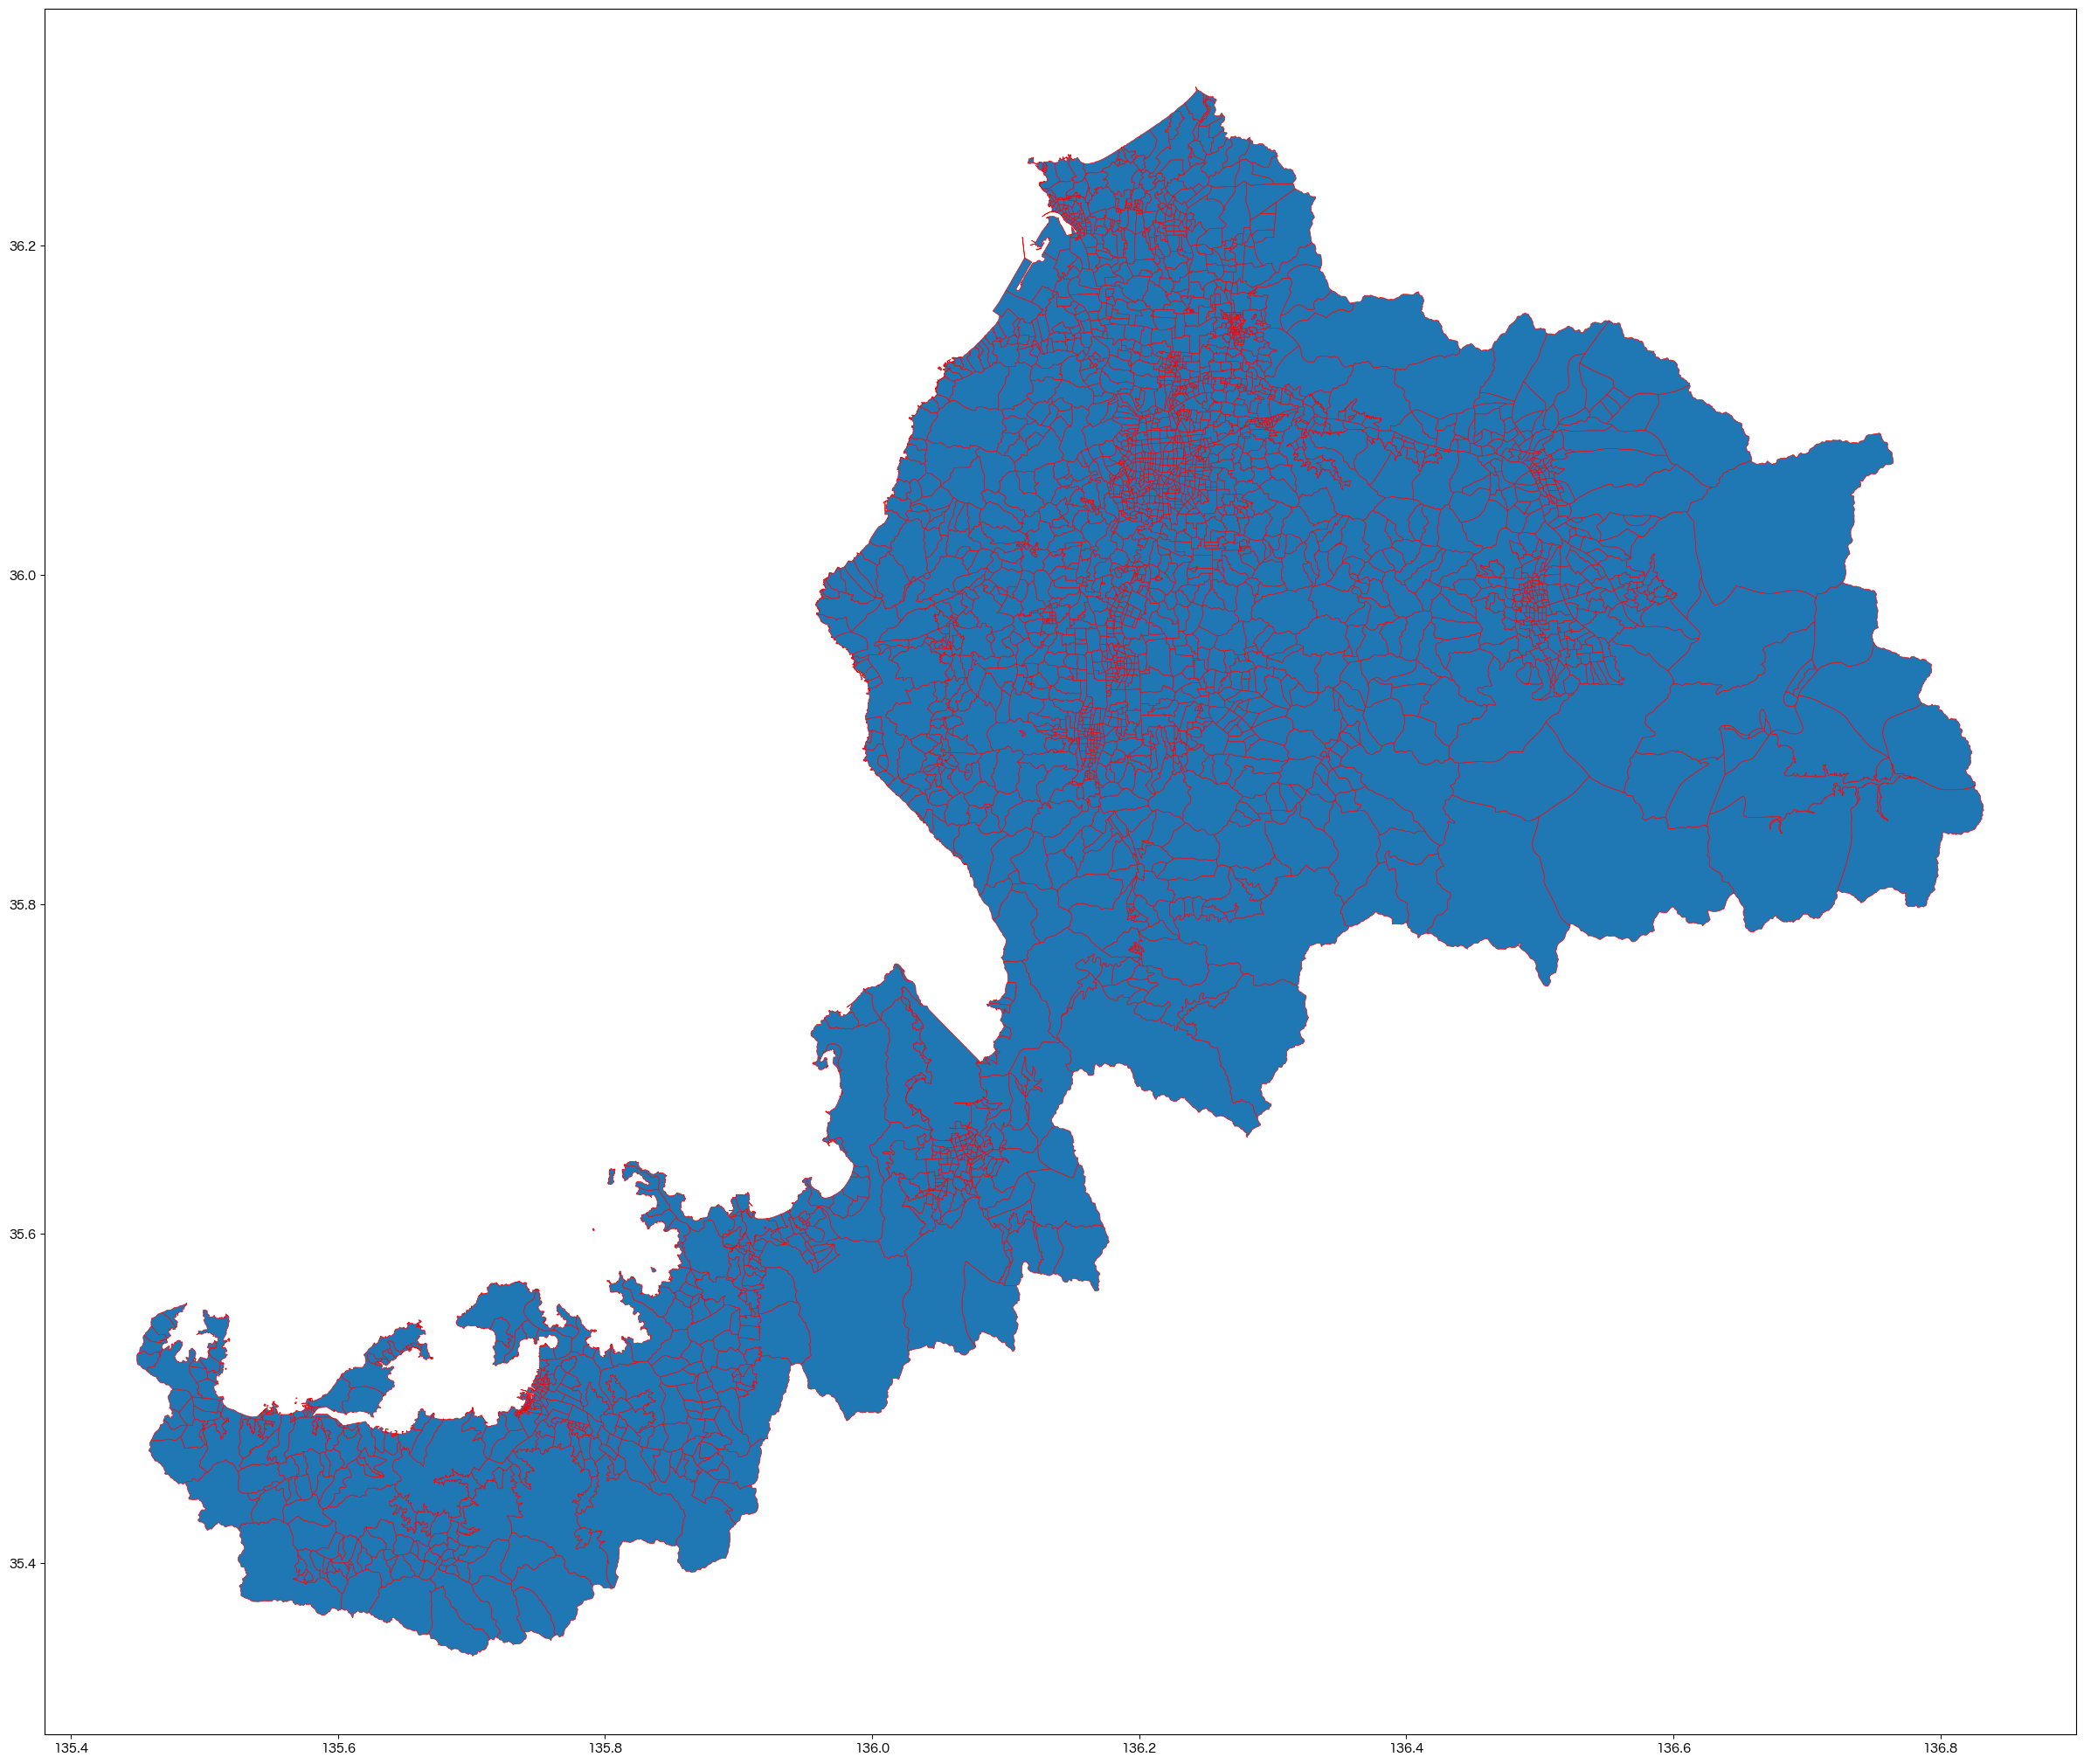

In [4]:
fukuimesh.plot(figsize=(30,30),edgecolor='red',linewidth=0.5)

In [5]:
fukuimesh.head()

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,N_KEN,N_CITY,KIGO_I,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
0,18,18,501,000000,福井県,若狭町,NaN,NaN,8101,12217.767,...,NaN,NaN,NaN,0,0,0,135.791397,35.602582,0000-00,"POLYGON ((135.79188 35.60192, 135.79172 35.601..."
1,182010010,18,201,001000,福井県,福井市,明里町,NaN,8101,146262.164,...,NaN,NaN,NaN,12,348,191,136.199130,36.060907,0010-00,"POLYGON ((136.19921 36.06301, 136.19939 36.063..."
2,182010030,18,201,003000,福井県,福井市,足谷町,NaN,8101,1484894.218,...,NaN,NaN,NaN,1,4,1,136.108947,36.076077,0030-00,"POLYGON ((136.11548 36.08178, 136.11548 36.081..."
3,18201004001,18,201,004001,福井県,福井市,足羽一丁目,NaN,8101,208288.799,...,NaN,NaN,NaN,27,715,303,136.209298,36.059308,0040-01,"POLYGON ((136.21044 36.06164, 136.21089 36.061..."
4,18201004002,18,201,004002,福井県,福井市,足羽二丁目,NaN,8101,82899.891,...,NaN,NaN,NaN,19,605,242,136.205254,36.060423,0040-02,"POLYGON ((136.20697 36.06164, 136.20698 36.061..."


In [6]:
fukuidata1 = pd.read_csv('data/pre3統計data.zip', encoding='cp932')

In [7]:
fukuidata1.head()

,KEY_CODE,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,T001081001,T001081002,T001081003,T001081004
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,人口総数,男,女,世帯総数
1,18201.0,1.0,福井市,NaN,0.0,NaN,NaN,262328,127867,134461,104470
2,182010010.0,2.0,福井市,明里町,0.0,NaN,NaN,348,178,170,191
3,182010030.0,2.0,福井市,足谷町,0.0,NaN,NaN,4,2,2,1
4,182010040.0,3.0,福井市,足羽,0.0,NaN,NaN,2814,1364,1450,1211


In [8]:
fukuidata1 = fukuidata1[1:]

In [9]:
fukuidata1 = fukuidata1.replace('*', np.nan)

In [18]:
fukuidata1 = fukuidata1.replace('-', np.nan)

In [19]:
fukuidata = pd.concat([fukuidata1])

In [20]:
fukuidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 1 to 3218
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    3218 non-null   float64
 1   HYOSYO      3218 non-null   float64
 2   CITYNAME    3218 non-null   object 
 3   NAME        3201 non-null   object 
 4   HTKSYORI    3218 non-null   float64
 5   HTKSAKI     0 non-null      float64
 6   GASSAN      0 non-null      float64
 7   T001081001  3143 non-null   object 
 8   T001081002  3137 non-null   object 
 9   T001081003  3138 non-null   object 
 10  T001081004  3143 non-null   object 
dtypes: float64(5), object(6)
memory usage: 276.7+ KB


In [12]:
fukuidata.columns

Index(['KEY_CODE', 'HYOSYO', 'CITYNAME', 'NAME', 'HTKSYORI', 'HTKSAKI',
       'GASSAN', 'T001081001', 'T001081002', 'T001081003', 'T001081004'],
      dtype='object')

In [13]:
fukuidata.columns[4:]

Index(['HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001081001', 'T001081002',
       'T001081003', 'T001081004'],
      dtype='object')

In [21]:
fukuidata[fukuidata.columns[4:]].astype(float)

,HTKSYORI,HTKSAKI,GASSAN,T001081001,T001081002,T001081003,T001081004
1,0.0,NaN,NaN,262328.0,127867.0,134461.0,104470.0
2,0.0,NaN,NaN,348.0,178.0,170.0,191.0
3,0.0,NaN,NaN,4.0,2.0,2.0,1.0
4,0.0,NaN,NaN,2814.0,1364.0,1450.0,1211.0
5,0.0,NaN,NaN,715.0,359.0,356.0,303.0
...,...,...,...,...,...,...,...
3214,0.0,NaN,NaN,99.0,49.0,50.0,30.0
3215,0.0,NaN,NaN,205.0,94.0,111.0,72.0
3216,0.0,NaN,NaN,150.0,70.0,80.0,48.0
3217,0.0,NaN,NaN,42.0,22.0,20.0,14.0


In [22]:
fukuidata[fukuidata.columns[4:]]=fukuidata[fukuidata.columns[4:]].astype(float)

In [23]:
fukuidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 1 to 3218
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    3218 non-null   float64
 1   HYOSYO      3218 non-null   float64
 2   CITYNAME    3218 non-null   object 
 3   NAME        3201 non-null   object 
 4   HTKSYORI    3218 non-null   float64
 5   HTKSAKI     0 non-null      float64
 6   GASSAN      0 non-null      float64
 7   T001081001  3143 non-null   float64
 8   T001081002  3137 non-null   float64
 9   T001081003  3138 non-null   float64
 10  T001081004  3143 non-null   float64
dtypes: float64(9), object(2)
memory usage: 276.7+ KB


In [24]:
fukuimesh['KEY_CODE']=fukuimesh['KEY_CODE'].astype(float)

In [25]:
fukuimesh = fukuimesh.merge(fukuidata, on='KEY_CODE')

In [26]:
fukuimesh.sample(5)

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,...,HYOSYO,CITYNAME,NAME,HTKSYORI,HTKSAKI,GASSAN,T001081001,T001081002,T001081003,T001081004
1552,1.820709e+08,18,207,086000,福井県,鯖江市,川島町,NaN,8101,1.849735e+06,...,2.0,鯖江市,川島町,0.0,NaN,NaN,613.0,292.0,321.0,171.0
2470,1.838201e+08,18,382,007000,福井県,池田町,割谷,NaN,8101,1.591036e+07,...,2.0,池田町,割谷,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2703,1.842308e+08,18,423,082000,福井県,越前町,上山中,NaN,8101,9.265083e+05,...,2.0,越前町,上山中,0.0,NaN,NaN,91.0,44.0,47.0,27.0
2413,1.832203e+10,18,322,031003,福井県,永平寺町,松ケ原三丁目,NaN,8101,3.559449e+04,...,4.0,永平寺町,松ケ原三丁目,0.0,NaN,NaN,223.0,113.0,110.0,128.0
1703,1.820811e+08,18,208,113000,福井県,あわら市,宮前,E3,8101,2.976487e+04,...,2.0,あわら市,宮前,0.0,NaN,NaN,78.0,31.0,47.0,22.0


In [27]:
fukuimesh = fukuimesh.to_crs(3857)

<Axes: >

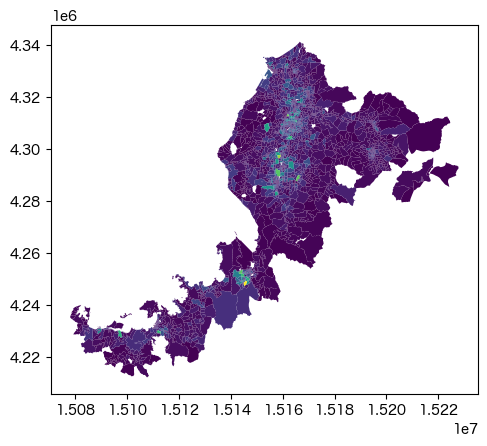

In [29]:
fukuimesh.plot(column='T001081001')

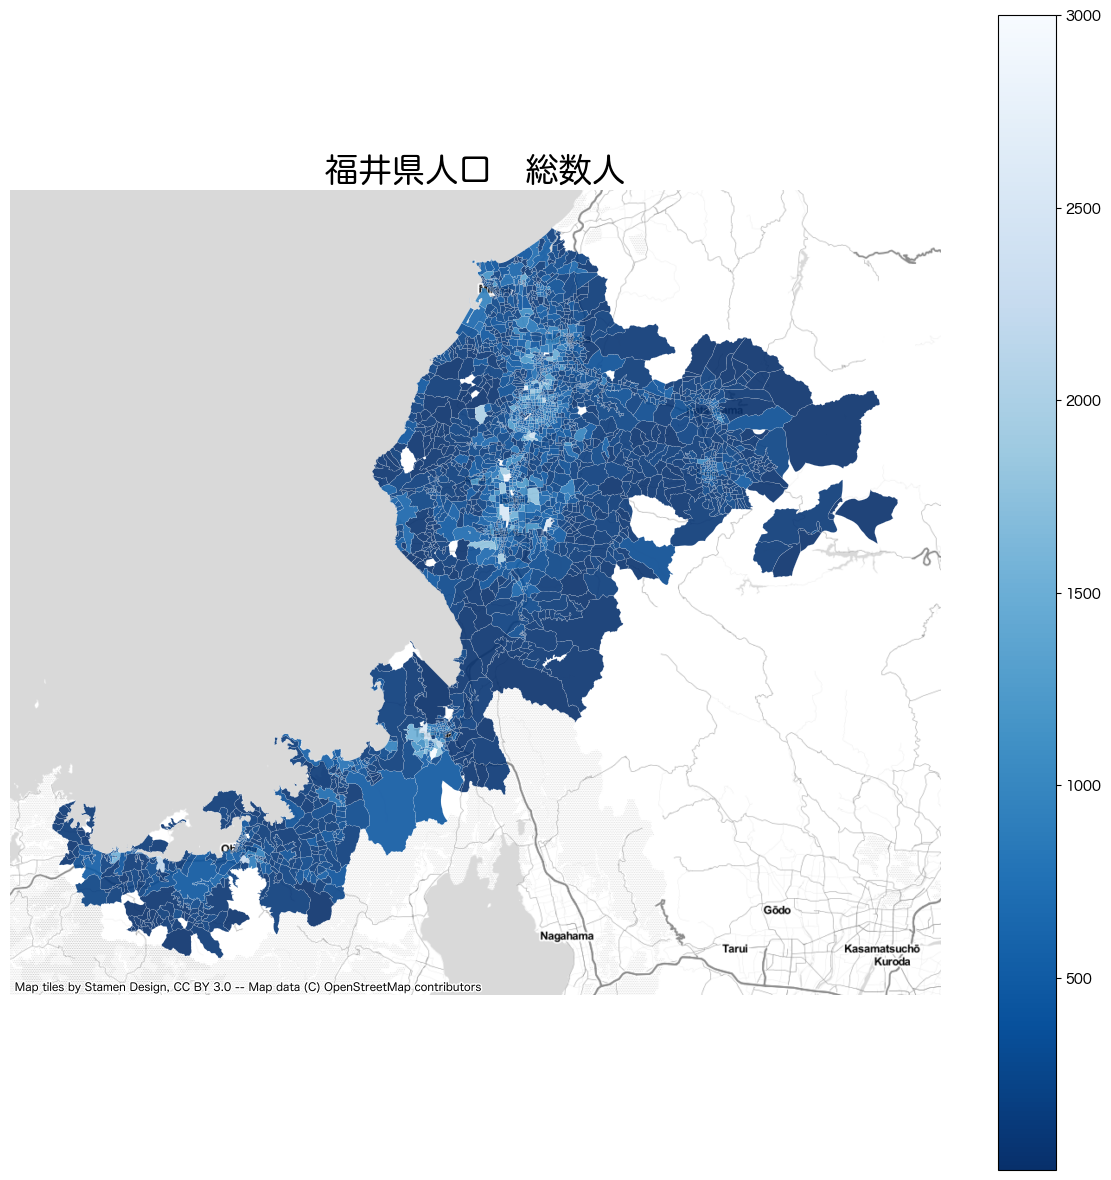

In [37]:
# population map
ax = fukuimesh.plot(figsize=(15,15),
         column='T001081001',
         legend=True,
         cmap='Blues_r',
         edgecolor='white',
         linewidth=0.1,
         alpha=0.9,
         vmax=3000)

# hide axes
ax.axis('off')

# title
ax.set_title('福井県人口　総数人',fontsize=24);

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)